In [1]:
# !pip install tensorflow-gpu==2.3.0

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\ARYAN\.conda\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ARYAN\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ARYAN\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
directory="PlantVillage2/"
classses=os.listdir(directory)

In [3]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

PlantVillage2/Potato___Early_blight
PlantVillage2/Potato___healthy
PlantVillage2/Potato___Late_blight


In [4]:
import random
random.shuffle(data1)

In [5]:
len(data1)

300

In [6]:
classses

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [7]:
len(classses)

3

In [8]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# VGG16 

In [11]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [12]:
progess = model.fit(x=X_train,y=y_train,epochs=15,validation_data= (X_test, y_test),batch_size=16)

Epoch 1/15
15/15 [==============================] - 173s 12s/step - loss: 2.6505 - accuracy: 0.3917 - val_loss: 0.6995 - val_accuracy: 0.8000
Epoch 2/15
15/15 [==============================] - 178s 12s/step - loss: 0.7435 - accuracy: 0.6792 - val_loss: 1.5929 - val_accuracy: 0.4500
Epoch 3/15
15/15 [==============================] - 173s 12s/step - loss: 1.1128 - accuracy: 0.5000 - val_loss: 0.8237 - val_accuracy: 0.7000
Epoch 4/15
15/15 [==============================] - 173s 12s/step - loss: 0.6406 - accuracy: 0.6958 - val_loss: 0.3447 - val_accuracy: 0.8333
Epoch 5/15
15/15 [==============================] - 163s 11s/step - loss: 0.3925 - accuracy: 0.8375 - val_loss: 0.2758 - val_accuracy: 0.8833
Epoch 6/15
15/15 [==============================] - 175s 12s/step - loss: 0.2505 - accuracy: 0.8792 - val_loss: 0.2561 - val_accuracy: 0.8833
Epoch 7/15
15/15 [==============================] - 163s 11s/step - loss: 0.3832 - accuracy: 0.8333 - val_loss: 0.2240 - val_accuracy: 0.9167
Epoch 

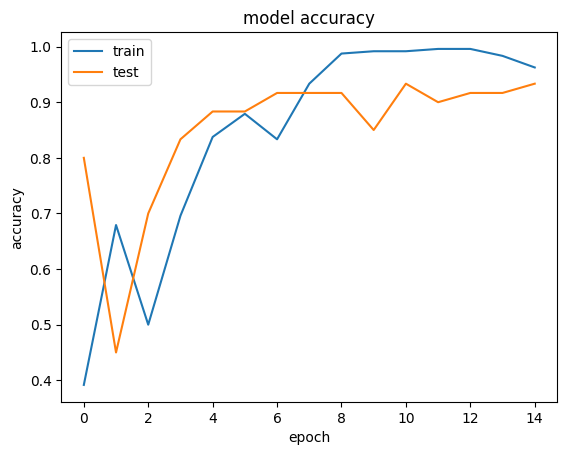

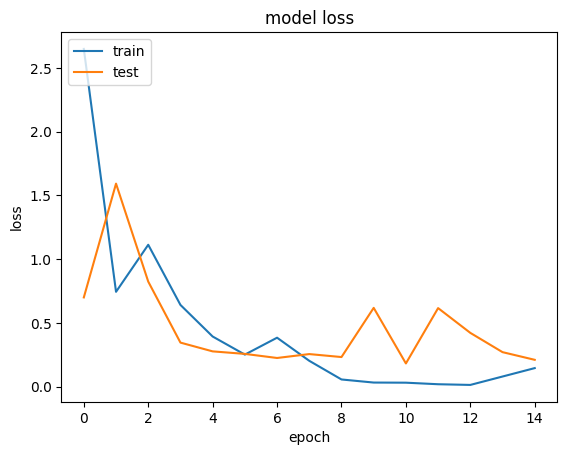

In [13]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [15]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                       precision    recall  f1-score   support

Potato___Early_blight       0.91      0.95      0.93        21
     Potato___healthy       0.96      1.00      0.98        25
 Potato___Late_blight       0.92      0.79      0.85        14

             accuracy                           0.93        60
            macro avg       0.93      0.91      0.92        60
         weighted avg       0.93      0.93      0.93        60



<AxesSubplot:>

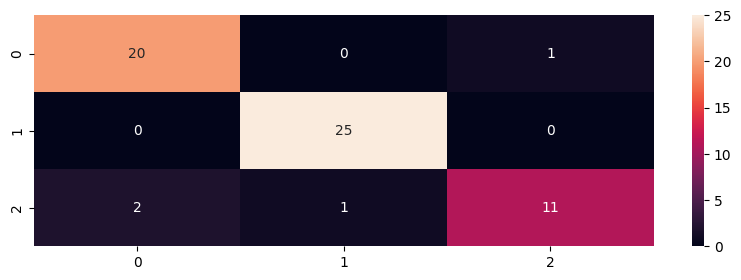

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [18]:
import json
import h5py

model_json = model.to_json()
with open("VGG_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("VGG_model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import tensorflow
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
# json_file.close()
loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


# Inception V3 

In [20]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
incept_model = Sequential()
incept_model.add(base_model)
incept_model.add(Flatten(input_shape=base_model.output_shape[1:]))
incept_model.add(Dense(256, activation='relu'))
incept_model.add(Dropout(0.2))
incept_model.add(Dense(128, activation='relu'))
incept_model.add(Dropout(0.2))
incept_model.add(Dense(len(classses), activation='softmax'))
incept_model = Model(inputs=incept_model.input, outputs=incept_model.output)
incept_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

87916544/87910968 [==============================] - 24s 0us/step


In [21]:
incept_progess = incept_model.fit(x=X_train,y=y_train,epochs=15,validation_data= (X_test, y_test),batch_size=128)

Epoch 1/15
2/2 [==============================] - 39s 20s/step - loss: 1.9943 - accuracy: 0.2708 - val_loss: 4.9037 - val_accuracy: 0.3500
Epoch 2/15
2/2 [==============================] - 40s 20s/step - loss: 0.9890 - accuracy: 0.5542 - val_loss: 1.3980 - val_accuracy: 0.4167
Epoch 3/15
2/2 [==============================] - 40s 20s/step - loss: 0.7251 - accuracy: 0.7000 - val_loss: 1.3703 - val_accuracy: 0.2333
Epoch 4/15
2/2 [==============================] - 44s 22s/step - loss: 0.3337 - accuracy: 0.8917 - val_loss: 1.6979 - val_accuracy: 0.2000
Epoch 5/15
2/2 [==============================] - 41s 21s/step - loss: 0.2037 - accuracy: 0.9500 - val_loss: 1.6320 - val_accuracy: 0.3000
Epoch 6/15
2/2 [==============================] - 41s 21s/step - loss: 0.0933 - accuracy: 0.9792 - val_loss: 1.4918 - val_accuracy: 0.2333
Epoch 7/15
2/2 [==============================] - 43s 22s/step - loss: 0.0428 - accuracy: 0.9958 - val_loss: 1.3318 - val_accuracy: 0.3500
Epoch 8/15
2/2 [===========

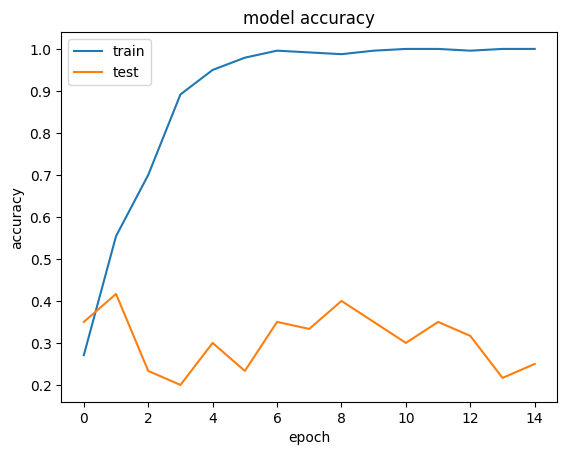

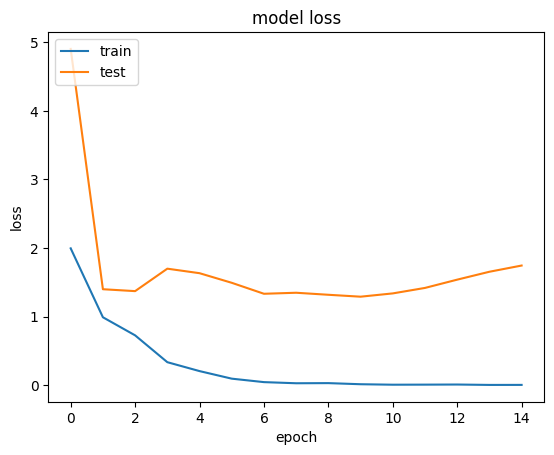

In [22]:
plt.plot(incept_progess.history['accuracy'])
plt.plot(incept_progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(incept_progess.history['loss'])
plt.plot(incept_progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = incept_model.predict(X_test)

y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break


<AxesSubplot:>

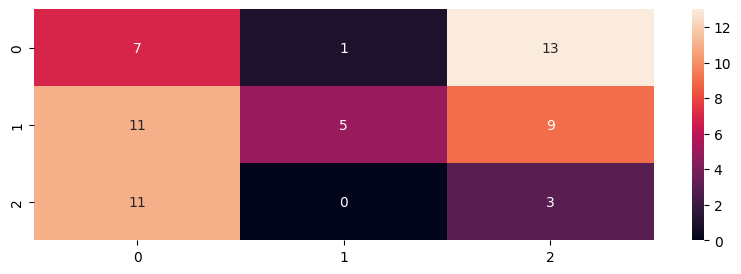

In [24]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [26]:
import json
import h5py

model_json = incept_model.to_json()
with open("incept_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
incept_model.save_weights("incept_model.h5")
print("Saved model to disk")

Saved model to disk


# Resnet 50 

In [27]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res_model = Sequential()
res_model.add(base_model)
res_model.add(Flatten(input_shape=base_model.output_shape[1:]))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(len(classses), activation='softmax'))
res_model = Model(inputs=res_model.input, outputs=res_model.output)
res_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

94773248/94765736 [==============================] - 44s 0us/step


In [28]:
res_progess = res_model.fit(x=X_train,y=y_train,epochs=15,validation_data= (X_test, y_test),batch_size=128)

Epoch 1/15


ResourceExhaustedError:  OOM when allocating tensor with shape[128,28,28,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node functional_5/resnet50/conv3_block1_3_bn/FusedBatchNormV3 (defined at \AppData\Local\Temp\ipykernel_25176\2136997036.py:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_49535]

Function call stack:
train_function


In [ ]:
plt.plot(res_progess.history['accuracy'])
plt.plot(res_progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(res_progess.history['loss'])
plt.plot(res_progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = res_model.predict(X_test)

y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [ ]:
import json
import h5py

model_json = res_model.to_json()
with open("res_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
res_model.save_weights("res_model.h5")
print("Saved model to disk")

In [22]:
# model.save("VGGSKin.hp5")

In [23]:
# !zip -r '/content/VGG_plant2.zip' '/content/VGGSKin.h5'

In [24]:
for i in os.listdir("test"):
    print(i)
    
    from tensorflow import keras
    # model = keras.models.load_model('/content/VGGSKin.h5')
    model = loaded_model
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="test/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    # model = keras.models.load_model('/content/VGGSKin.h5')
    model = loaded_model
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
    # dict1={0:'acne',1:'hairloss',2:'melanoma',3:'snailfungus',4:'vitiligo'}
    
# ['Pepper__bell___Bacterial_spot',
#  'Pepper__bell___healthy',
#  'Potato___Early_blight',
#  'Potato___healthy',
#  'Potato___Late_blight',
#  'Tomato_Bacterial_spot',
#  'Tomato_Early_blight',
#  'Tomato_healthy',
#  'Tomato_Late_blight',
#  'Tomato_Leaf_Mold',
#  'Tomato_Septoria_leaf_spot',
#  'Tomato__Target_Spot',
#  'Tomato__Tomato_mosaic_virus']
    
    
    dict1={0:'Potato___Early_blight',
            1:'Potato___healthy',
            2:'Potato___Late_blight'}
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break

Pepper__bell___Bacterial_spot.JPG


Using TensorFlow backend.


<class 'numpy.ndarray'>
[0.7197319  0.00426756 0.27600056]
0
Pepper__bell___Bacterial_spot Detected in Image
-----------------------------------------------
Pepper__bell___healthy.JPG
<class 'numpy.ndarray'>
[0.33593976 0.21330543 0.45075485]
2
Potato___Early_blight Detected in Image
-----------------------------------------------
Potato___Early_blight.JPG
<class 'numpy.ndarray'>
[0.6665199  0.08778576 0.24569432]
0
Pepper__bell___Bacterial_spot Detected in Image
-----------------------------------------------
Potato___healthy.JPG
<class 'numpy.ndarray'>
[5.1108669e-05 9.9833918e-01 1.6097402e-03]
1
Pepper__bell___healthy Detected in Image
-----------------------------------------------
Potato___Late_blight.JPG
<class 'numpy.ndarray'>
[4.6521527e-04 7.0085891e-02 9.2944890e-01]
2
Potato___Early_blight Detected in Image
-----------------------------------------------
Tomato_Bacterial_spot.JPG
<class 'numpy.ndarray'>
[0.00519821 0.11004102 0.8847608 ]
2
Potato___Early_blight Detected in 